**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [973]:
# Import Libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [974]:
# 2110, 11676, 98391, 276725, 277427
u_id=2110

In [975]:
# Loading data
# There are issues in 19 records and the same has been retained inspite of erros and the file loaded

books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [976]:
books.shape

(271360, 8)

In [977]:
users.shape

(278858, 3)

In [978]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [979]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [980]:
books=books.iloc[:,:-3]

In [981]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [982]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [983]:
# checking if there are rows with DK Publishing Inc in yearOfPublication column 
books[books['yearOfPublication'].str.contains("DK Publishing Inc")==True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [984]:
indexNames = books[ (books['yearOfPublication'] == 'DK Publishing Inc') | (books['yearOfPublication'] == 'Gallimard') ].index

In [985]:
books.drop(indexNames , inplace=True)

In [986]:
# Checking to see if rows are dropped 
books[books['yearOfPublication'].str.contains("DK Publishing Inc")==True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [987]:
# Checking to see if rows are dropped 
books[books['yearOfPublication'].str.contains("Gallimard")==True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [988]:
books.shape

(271357, 5)

In [989]:
# Check the existing datatype
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [990]:
# to change datatype use .astype() function 
books['yearOfPublication'] = books.yearOfPublication.astype(int)

In [991]:
# Check to see if the datatype has changed
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [992]:
books.shape

(271357, 5)

In [993]:
books = books[pd.notnull(books['publisher'])]

In [994]:
books.shape

(271355, 5)

## Exploring Users dataset

In [995]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [996]:
np.sort(users.Age.unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [997]:
users.shape

(278858, 3)

In [998]:
users["Age"].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [999]:
print('Count of users with Age below 5 and above 90 is : ',users[users['Age']<5].Age.count()+users[users['Age']>90].Age.count())
print('Sun of Age before making the values below 5 and above 90 NaN is : ', users['Age'].isna().sum())
users.loc[users['Age'] < 5, 'Age'] = np.nan
users.loc[users['Age'] > 90, 'Age'] = np.nan
print('Sun of Age after making the values below 5 and above 90 NaN is : ', users['Age'].isna().sum())

Count of users with Age below 5 and above 90 is :  1312
Sun of Age before making the values below 5 and above 90 NaN is :  110762
Sun of Age after making the values below 5 and above 90 NaN is :  112074


### Replace null values in column `Age` with mean

In [1000]:
users['Age'].fillna((users['Age'].mean()), inplace=True)

In [1001]:
users

,userID,Location,Age
0,1,"nyc, new york, usa",34.72384
1,2,"stockton, california, usa",18.00000
2,3,"moscow, yukon territory, russia",34.72384
3,4,"porto, v.n.gaia, portugal",17.00000
4,5,"farnborough, hants, united kingdom",34.72384
5,6,"santa monica, california, usa",61.00000
6,7,"washington, dc, usa",34.72384
7,8,"timmins, ontario, canada",34.72384
8,9,"germantown, tennessee, usa",34.72384
9,10,"albacete, wisconsin, spain",26.00000


### Change the datatype of `Age` to `int`

In [1002]:
# Check the existing datatype
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [1003]:
# Use the .astype() function to change data type
users['Age'] = users.Age.astype(int)

In [1004]:
# Check if the data type has been changed
users.dtypes

userID       int64
Location    object
Age          int32
dtype: object

## Exploring the Ratings Dataset

### check the shape

In [1005]:
ratings.shape

(1149780, 3)

In [1006]:
n_users = users.shape[0]
n_books = books.shape[0]

In [1007]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [1008]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [1009]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [1010]:
ratings.shape[0]

1149780

In [1011]:
users.shape[0]

278858

In [1012]:
books.shape[0]

271355

In [1013]:
ratings  = ratings[ratings.ISBN.isin(books.ISBN)]

In [1014]:
ratings.shape[0]

1031130

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [1015]:
ratings = ratings[ratings.userID.isin(users.userID)]

In [1016]:
ratings.shape[0]

1031130

In [1017]:
ratings

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
8,276744,038550120X,7
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [1018]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [1019]:
ratings = ratings[ratings.bookRating != 0]

In [1020]:
ratings

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
21,276747,0943066433,7
23,276747,1885408226,7
24,276748,0747558167,6


### Find out which rating has been given highest number of times

In [1021]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

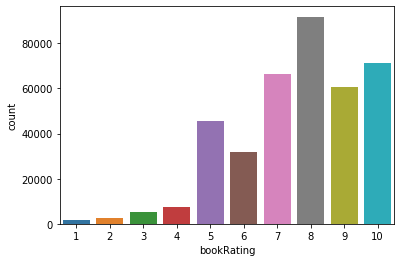

In [1022]:
sns.countplot(data = ratings, x = 'bookRating')
# The rating 8 has been given the most number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [1023]:
ratings.shape

(383839, 3)

In [1024]:
user_rating_counts=ratings['userID'].value_counts()
ratings=ratings[ratings['userID'].isin(user_rating_counts[user_rating_counts >= 100].index)]

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [1025]:
# Checking for NaN in dataset
ratings.isnull().values.any()

False

In [1026]:
# Checking for NaN in dataset
books.isnull().values.any()

True

In [1027]:
# Checking for NaN in dataset
users.isnull().values.any()

False

In [1028]:
# Since books dataset has NaN replacing them with 0
books.fillna(0, inplace=True)

In [1029]:
# Rechecking if the fill command has achieved it objective
books.isnull().values.any()

False

In [1030]:
# Using the pivot command to build ratings_matrix
ratings_matrix = ratings.pivot(index='userID',columns='ISBN',values='bookRating')

In [1031]:
print (ratings_matrix)

ISBN    0000913154  0001046438  000104687X  0001047213  0001047973  \
userID                                                               
2033           NaN         NaN         NaN         NaN         NaN   
2110           NaN         NaN         NaN         NaN         NaN   
2276           NaN         NaN         NaN         NaN         NaN   
4017           NaN         NaN         NaN         NaN         NaN   
4385           NaN         NaN         NaN         NaN         NaN   
5582           NaN         NaN         NaN         NaN         NaN   
6242           NaN         NaN         NaN         NaN         NaN   
6251           NaN         NaN         NaN         NaN         NaN   
6543           NaN         NaN         NaN         NaN         NaN   
6575           NaN         NaN         NaN         NaN         NaN   
7286           NaN         NaN         NaN         NaN         NaN   
7346           NaN         NaN         NaN         NaN         NaN   
8067           NaN  

### Generate the predicted ratings using SVD function from surprise library

In [1032]:
from collections import defaultdict
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise import evaluate, print_perf

In [1033]:
# Extract random 6000 rows due to memory error running the whole ratings dataset
random_subset_ratings = ratings.sample(n=6000)

In [1034]:
random_subset_ratings

,userID,ISBN,bookRating
426665,101851,1930206054,9
48159,11676,0374523193,7
654166,158295,0892966564,6
1110573,266226,0804106304,9
978086,235282,0449003981,9
47934,11676,0373169752,6
14239,2033,0812523040,10
845841,204864,0140280898,10
314363,75819,0974537616,8
568929,136382,0451202341,7


In [1035]:
# Drop all rows with userID = 277427
# And reinsert rows with all rows for 277427 value from ratings dataset
random_subset_ratings.drop(random_subset_ratings[random_subset_ratings['userID'] == u_id].index, inplace = True)
udata_subset_ratings = ratings[ratings['userID'] == u_id]

# Please note I was unable to run this with the entire data set due to memory issues and hence have truncated the dataset

In [1036]:
random_subset_ratings

,userID,ISBN,bookRating
426665,101851,1930206054,9
48159,11676,0374523193,7
654166,158295,0892966564,6
1110573,266226,0804106304,9
978086,235282,0449003981,9
47934,11676,0373169752,6
14239,2033,0812523040,10
845841,204864,0140280898,10
314363,75819,0974537616,8
568929,136382,0451202341,7


In [1037]:
udata_subset_ratings

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5
14455,2110,015216250X,8
14457,2110,0345260627,10
14458,2110,0345283554,10
14459,2110,0345283929,10
14460,2110,034528710X,10


In [1038]:
print (random_subset_ratings.shape)
print (udata_subset_ratings.shape)

(5997, 3)
(103, 3)


In [1039]:
frames = [random_subset_ratings, udata_subset_ratings]
ratings_trunc = pd.concat(frames)
print (ratings_trunc.shape)

(6100, 3)


In [1040]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))

In [1041]:
ratings_matrix_data = Dataset.load_from_df(ratings_trunc,reader)

# ratings_trunc = explicit

In [1042]:
trainset = ratings_matrix_data.build_full_trainset()

In [1043]:
trainset 

In [1044]:
trainset.ur

defaultdict(list,
            {0: [(0, 9.0),
              (495, 9.0),
              (959, 5.0),
              (1436, 10.0),
              (1441, 7.0),
              (2044, 9.0),
              (2097, 9.0),
              (2178, 9.0),
              (2242, 8.0),
              (2288, 7.0),
              (2414, 9.0),
              (2608, 8.0),
              (2766, 10.0),
              (14, 10.0),
              (3035, 8.0),
              (3284, 10.0),
              (3410, 9.0),
              (3433, 8.0),
              (3696, 10.0),
              (3709, 9.0),
              (3831, 10.0),
              (3965, 10.0),
              (4161, 8.0),
              (4332, 10.0),
              (4615, 9.0),
              (4991, 9.0),
              (4999, 10.0),
              (413, 10.0)],
             1: [(1, 7.0),
              (5, 6.0),
              (22, 9.0),
              (23, 7.0),
              (24, 8.0),
              (26, 7.0),
              (27, 9.0),
              (30, 9.0),
              (55, 

In [1045]:
algo = SVD()
algo.fit(trainset)

In [1046]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [1047]:
testset

[(101851, '0374523193', 7.797704918032787),
 (101851, '0892966564', 7.797704918032787),
 (101851, '0804106304', 7.797704918032787),
 (101851, '0449003981', 7.797704918032787),
 (101851, '0373169752', 7.797704918032787),
 (101851, '0812523040', 7.797704918032787),
 (101851, '0140280898', 7.797704918032787),
 (101851, '0974537616', 7.797704918032787),
 (101851, '0451202341', 7.797704918032787),
 (101851, '0843944463', 7.797704918032787),
 (101851, '0785810641', 7.797704918032787),
 (101851, '042518286X', 7.797704918032787),
 (101851, '1878448900', 7.797704918032787),
 (101851, '1587150212', 7.797704918032787),
 (101851, '0929605144', 7.797704918032787),
 (101851, '0671550500', 7.797704918032787),
 (101851, '0345438019', 7.797704918032787),
 (101851, '0060197846', 7.797704918032787),
 (101851, '0380709473', 7.797704918032787),
 (101851, '0671014919', 7.797704918032787),
 (101851, '0375500693', 7.797704918032787),
 (101851, '2070362361', 7.797704918032787),
 (101851, '0671722794', 7.797704

In [1048]:
predictions = algo.test(testset)

In [1049]:
predictions

[Prediction(uid=101851, iid='0374523193', r_ui=7.797704918032787, est=8.681435046321484, details={'was_impossible': False}),
 Prediction(uid=101851, iid='0892966564', r_ui=7.797704918032787, est=8.647831499655238, details={'was_impossible': False}),
 Prediction(uid=101851, iid='0804106304', r_ui=7.797704918032787, est=8.694510033515062, details={'was_impossible': False}),
 Prediction(uid=101851, iid='0449003981', r_ui=7.797704918032787, est=8.77973974408614, details={'was_impossible': False}),
 Prediction(uid=101851, iid='0373169752', r_ui=7.797704918032787, est=8.598729558935133, details={'was_impossible': False}),
 Prediction(uid=101851, iid='0812523040', r_ui=7.797704918032787, est=8.924742899377915, details={'was_impossible': False}),
 Prediction(uid=101851, iid='0140280898', r_ui=7.797704918032787, est=9.023895599502548, details={'was_impossible': False}),
 Prediction(uid=101851, iid='0974537616', r_ui=7.797704918032787, est=8.720559091824846, details={'was_impossible': False}),
 

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [1050]:
userID = u_id

In [1051]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [1052]:
top_n = defaultdict(list)

def is_empty(any_structure):
    if any_structure:
        return False
    else:
        return True
    
def get_all_user_ratings(predictions):
    # First map the predictions to each user.
    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        # top_n[uid] = user_ratings[:n]
        top_n[uid] = user_ratings

    return top_n

def get_user_ratings(predictions, user_id):
    if (is_empty(top_n)):
        get_all_user_ratings(predictions)
        user_ratings = top_n.get(userID)
    else:
        user_ratings = top_n.get(userID)
    
    return user_ratings

In [1053]:
user_ratings = get_user_ratings(predictions,userID)

In [1054]:
user_ratings

[('0843949767', 9.22835697764021),
 ('0740704818', 9.146406235208108),
 ('0140057579', 9.138447689308512),
 ('0425155943', 9.128824826216613),
 ('B00009EF82', 9.126562424133956),
 ('038080722X', 9.10699510769371),
 ('0380704587', 9.097707538569747),
 ('0451167538', 9.097565173281035),
 ('0871136791', 9.086733134547288),
 ('0385497466', 9.07163173152157),
 ('0743227441', 9.068413254622492),
 ('0452283914', 9.065372849897201),
 ('048623052X', 9.06416041452735),
 ('0871562782', 9.0640815283382),
 ('0375705171', 9.063661137286136),
 ('043936213X', 9.062301944735173),
 ('0916122506', 9.061252997518814),
 ('0671500147', 9.060821642546065),
 ('0517574284', 9.05306849127291),
 ('0912500247', 9.052060404021665),
 ('0553210939', 9.046554507057731),
 ('0671886665', 9.03515233844323),
 ('0070248125', 9.033031385064152),
 ('0394868811', 9.025516751394344),
 ('0830716076', 9.023734287164077),
 ('0394829204', 9.023049911826883),
 ('0064401480', 9.018096898330697),
 ('0553262556', 9.01620253319415),
 

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [1055]:
user_data = ratings_trunc[ratings_trunc['userID']==u_id]

In [1056]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [1057]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [1058]:
book_data=books[books['ISBN'].isin(user_data['ISBN'])]

In [1059]:
book_data.shape

(103, 5)

In [1060]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [1061]:
user_full_info = pd.merge(user_data, book_data, on='ISBN')

In [1062]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [1063]:
not_rated_books=ratings[(ratings['userID']==u_id) & (ratings['bookRating']==0)]['ISBN'].tolist()

In [1064]:
def get_user_rating_books_list(user_ratings):
    books_list=[]
    
    for isbn, user_rating in user_ratings:
        if (isbn in not_rated_books):
            books_list.append(isbn)
    return books_list

def get_top_k_books_list(books_list,k):
    return books_list[:k]

In [1065]:
user_books_list = get_user_rating_books_list(user_ratings)
top_10_recommendations = get_top_k_books_list(user_books_list,10)
print (top_10_recommendations)

[]


In [1066]:
books[books['ISBN'].isin(top_10_recommendations)]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
